In [1]:
import tweepy
import pandas as pd

In [2]:
# API Key setup
api_key = 'XLrT4TY4C8ZdIFQOMri1QX6Cc'
api_secret_key = 'nFdnp9YT30Omojj9JZdtqD6j6qKP6vvuo65FjLOt6Fe0eotwpZ'
access_token = '3083368926-c7fXpsH0k1Hrqs6bNe7954RMMp7viwgK7paRuHX'
access_token_secret = 'bTTr0tiF4Xizcnjj7gGS1efzhSN5Co8Cgcc0P1cHjMXeF'
# Bearer token from Twitter API v2
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAJttvwEAAAAAve3ZMFPG3IVh5poNuakDQUxLo%2Fw%3DcdUn78VL26nE15hTVzu9hjKEl1raNd8xRnvL00uVVloJABXMSD'

In [3]:
# Authenticate to Twitter
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
import tweepy
import logging

# Create client for Twitter API v2
client = tweepy.Client(bearer_token=bearer_token)

# Query tweets using the v2 API
query = 'attrition risk OR employee turnover OR workplace stress OR HR issues lang:en'
response = client.search_recent_tweets(query=query, tweet_fields=['created_at', 'author_id', 'text'], max_results=100)

# Store tweet details in a DataFrame
tweet_data = []
for tweet in response.data:
    tweet_data.append([tweet.created_at, tweet.author_id, tweet.text])

df_tweets = pd.DataFrame(tweet_data, columns=['Timestamp', 'Author_ID', 'Tweet'])

# Display first few rows
print(df_tweets.head())


                  Timestamp            Author_ID  \
0 2024-11-07 16:33:08+00:00            478628326   
1 2024-11-07 16:30:40+00:00           2161952707   
2 2024-11-07 16:25:59+00:00             19405837   
3 2024-11-07 16:17:40+00:00  1802797893293670400   
4 2024-11-07 16:16:44+00:00  1397389666177806343   

                                               Tweet  
0  RT @mochi72408283: He already showed signs of ...  
1  RT @brianpslough: #Startups basics; prepare fo...  
2  RT @NAMICommunicate: Today, let's pause and ta...  
3  RT @Dr_Bob_Rankin: @kittysull1 I have no issue...  
4  RT @mochi72408283: He already showed signs of ...  


In [5]:
import re

def clean_tweet(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#', '', text)        # Remove hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    return text.strip().lower()

df_tweets['Cleaned_Tweet'] = df_tweets['Tweet'].apply(clean_tweet)
print(df_tweets[['Tweet', 'Cleaned_Tweet']].head())


                                               Tweet  \
0  RT @mochi72408283: He already showed signs of ...   
1  RT @brianpslough: #Startups basics; prepare fo...   
2  RT @NAMICommunicate: Today, let's pause and ta...   
3  RT @Dr_Bob_Rankin: @kittysull1 I have no issue...   
4  RT @mochi72408283: He already showed signs of ...   

                                       Cleaned_Tweet  
0  rt  he already showed signs of health issues l...  
1  rt  startups basics prepare for employmentlaw ...  
2  rt  today lets pause and take a moment for you...  
3  rt   i have no issues with public services in ...  
4  rt  he already showed signs of health issues l...  


In [6]:
pip install tf-keras

Note: you may need to restart the kernel to use updated packages.


In [7]:
from transformers import pipeline

# Load sentiment-analysis pipeline
sentiment_model = pipeline('sentiment-analysis')

# Apply sentiment analysis
df_tweets['Sentiment'] = df_tweets['Cleaned_Tweet'].apply(lambda tweet: sentiment_model(tweet)[0]['label'])

print(df_tweets[['Cleaned_Tweet', 'Sentiment']].head())


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


                                       Cleaned_Tweet Sentiment
0  rt  he already showed signs of health issues l...  NEGATIVE
1  rt  startups basics prepare for employmentlaw ...  NEGATIVE
2  rt  today lets pause and take a moment for you...  POSITIVE
3  rt   i have no issues with public services in ...  NEGATIVE
4  rt  he already showed signs of health issues l...  NEGATIVE


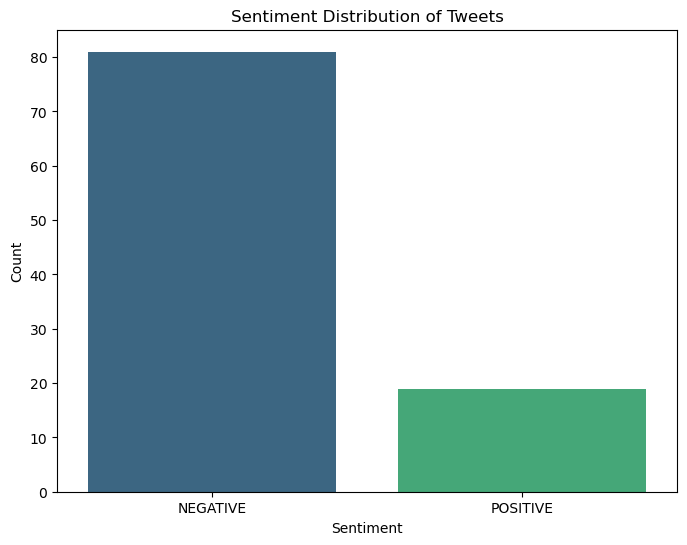

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the sentiment occurrences
sentiment_counts = df_tweets['Sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution of Tweets')
plt.show()


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X = vectorizer.fit_transform(df_tweets['Cleaned_Tweet'])

# Convert to DataFrame
df_features = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming you have labels for training
y = df_tweets['Sentiment'] 

# Split data
X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    NEGATIVE       0.86      1.00      0.92        24
    POSITIVE       1.00      0.33      0.50         6

    accuracy                           0.87        30
   macro avg       0.93      0.67      0.71        30
weighted avg       0.89      0.87      0.84        30



In [11]:
import time
import logging
import pandas as pd

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger()

def process_tweets():
    tweet_count = 0
    max_tweets = 5
    
    while tweet_count < max_tweets:
        start_time = time.time()
        
        try:
            # Fetch new tweets
            fetch_start = time.time()
            response = client.search_recent_tweets(query=query, tweet_fields=['created_at', 'author_id', 'text'], max_results=10)
            if response.data is None:
                logger.warning("No tweets found.")
                time.sleep(60)  # Sleep and retry if no tweets
                continue
            fetch_time = time.time() - fetch_start
            
            # Process and clean tweets
            process_start = time.time()
            new_tweets = pd.DataFrame([[tweet.created_at, tweet.author_id, tweet.text] for tweet in response.data], columns=['Timestamp', 'Author_ID', 'Tweet'])
            new_tweets['Cleaned_Tweet'] = new_tweets['Tweet'].apply(clean_tweet)
            process_time = time.time() - process_start
            
            # Extract features
            feature_start = time.time()
            new_features = vectorizer.transform(new_tweets['Cleaned_Tweet'])
            df_new_features = pd.DataFrame(new_features.toarray(), columns=vectorizer.get_feature_names_out())
            feature_time = time.time() - feature_start
            
            # Predict attrition risk
            predict_start = time.time()
            predictions = model.predict(df_new_features)
            predict_time = time.time() - predict_start
            
            # Output predictions and increment tweet_count
            for tweet, prediction in zip(new_tweets['Tweet'], predictions):
                if tweet_count < max_tweets:
                    print(f"Tweet: {tweet}\nPrediction: {prediction}\n")
                    tweet_count += 1
                else:
                    break
            
            # Log times
            logger.info(f"Fetch time: {fetch_time:.2f} seconds")
            logger.info(f"Process time: {process_time:.2f} seconds")
            logger.info(f"Feature extraction time: {feature_time:.2f} seconds")
            logger.info(f"Prediction time: {predict_time:.2f} seconds")
        
        except Exception as e:
            logger.error(f"An error occurred: {e}")
            break
        
        if tweet_count < max_tweets:
            # Sleep for a while before fetching new tweets
            time.sleep(60)  # Fetch new tweets every 1 minute
    
    print("Processed 5 tweets. Exiting...")

# Run the real-time processing function
process_tweets()


INFO:root:Fetch time: 0.22 seconds
INFO:root:Process time: 0.00 seconds
INFO:root:Feature extraction time: 0.00 seconds
INFO:root:Prediction time: 0.01 seconds


Tweet: Did you see our latest newsletter? Click here to read and subscribe to The 9-To-Thrive

https://t.co/46EWF59MPB

#wellbeing #workplace #stress #pressure #performance #ResilienceBuilding #pscyhologicalsafety #growth #energy #engagement #diagnostics
Prediction: NEGATIVE

Tweet: With how you think.🤔 A whole HR talking like she hasn't been thought about life. Make sure you start applying your cramping to real life issues now.
Prediction: NEGATIVE

Tweet: RT @mochi72408283: He already showed signs of health issues like this but some ppl still consider his absence as “resting”, what more do u…
Prediction: NEGATIVE

Tweet: RT @brianpslough: #Startups basics; prepare for #employmentlaw issues: Correctly classify contractors, employees, interns &amp; volunteers. Pay…
Prediction: NEGATIVE

Tweet: RT @NAMICommunicate: Today, let's pause and take a moment for you. From workplace stress to election stress, life can bring its share of ch…
Prediction: POSITIVE

Processed 5 tweets. Exiting...


### Applying LLM --> GPT2

In [12]:
from transformers import pipeline

# Initialize the sentiment-analysis pipeline
sentiment_model = pipeline('sentiment-analysis')


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [13]:
# Apply sentiment analysis using the LLM
df_tweets['LLM_Sentiment'] = df_tweets['Cleaned_Tweet'].apply(lambda tweet: sentiment_model(tweet)[0]['label'])

print(df_tweets[['Cleaned_Tweet', 'LLM_Sentiment']].head())


                                       Cleaned_Tweet LLM_Sentiment
0  rt  he already showed signs of health issues l...      NEGATIVE
1  rt  startups basics prepare for employmentlaw ...      NEGATIVE
2  rt  today lets pause and take a moment for you...      POSITIVE
3  rt   i have no issues with public services in ...      NEGATIVE
4  rt  he already showed signs of health issues l...      NEGATIVE


In [14]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Initialize GPT-2 model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')


C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [15]:
# def generate_topics(text, max_input_length=50, max_new_tokens=20):
#     # Truncate the input text if it's longer than the max_input_length
#     inputs = tokenizer.encode(text[:max_input_length], return_tensors='pt')
    
#     # Generate topics with a set number of new tokens
#     outputs = model.generate(inputs, max_new_tokens=max_new_tokens, num_return_sequences=1)
    
#     return tokenizer.decode(outputs[0], skip_special_tokens=True)

# # Apply topic generation to the cleaned tweets
# df_tweets['Generated_Topics'] = df_tweets['Cleaned_Tweet'].apply(generate_topics)

# # Display the results
# print(df_tweets[['Cleaned_Tweet', 'Generated_Topics']].head())


In [16]:
# Set the tokenizer's pad_token to eos_token
tokenizer.pad_token = tokenizer.eos_token

def generate_topics(text, max_input_length=50, max_new_tokens=20):
    if not text or len(text.strip()) == 0:  # Check if the text is empty
        return "No Content"
    
    # Tokenize the input text, add attention mask, and truncate if needed
    inputs = tokenizer(text, return_tensors='pt', padding='max_length', truncation=True, max_length=max_input_length)
    
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']

    # Generate topics with a set number of new tokens, pass attention mask
    outputs = model.generate(input_ids, 
                             attention_mask=attention_mask, 
                             max_new_tokens=max_new_tokens, 
                             pad_token_id=tokenizer.eos_token_id,
                             num_return_sequences=1)
    
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Ensure no empty or NaN values in the 'Cleaned_Tweet' column
df_tweets['Cleaned_Tweet'] = df_tweets['Cleaned_Tweet'].fillna("")

# Apply topic generation to the cleaned tweets
df_tweets['Generated_Topics'] = df_tweets['Cleaned_Tweet'].apply(generate_topics)

# Display the results
print(df_tweets[['Cleaned_Tweet', 'Generated_Topics']].head())


                                       Cleaned_Tweet  \
0  rt  he already showed signs of health issues l...   
1  rt  startups basics prepare for employmentlaw ...   
2  rt  today lets pause and take a moment for you...   
3  rt   i have no issues with public services in ...   
4  rt  he already showed signs of health issues l...   

                                    Generated_Topics  
0  rt  he already showed signs of health issues l...  
1  rt  startups basics prepare for employmentlaw ...  
2  rt  today lets pause and take a moment for you...  
3  rt   i have no issues with public services in ...  
4  rt  he already showed signs of health issues l...  


In [17]:
def process_tweets_with_llm():
    tweet_count = 0  # Counter for the number of tweets processed
    
    while tweet_count < 5:  # Loop until 5 tweets are processed
        # Fetch new tweets
        response = client.search_recent_tweets(query=query, tweet_fields=['created_at', 'author_id', 'text'], max_results=10)
        
        # Process and clean tweets
        new_tweets = pd.DataFrame([[tweet.created_at, tweet.author_id, tweet.text] for tweet in response.data], columns=['Timestamp', 'Author_ID', 'Tweet'])
        new_tweets['Cleaned_Tweet'] = new_tweets['Tweet'].apply(clean_tweet)
        
        # Apply LLM sentiment analysis
        new_tweets['LLM_Sentiment'] = new_tweets['Cleaned_Tweet'].apply(lambda tweet: sentiment_model(tweet)[0]['label'])
        
        # Output results
        for tweet, sentiment in zip(new_tweets['Tweet'], new_tweets['LLM_Sentiment']):
            print(f"Tweet: {tweet}\nLLM Sentiment: {sentiment}\n")
            tweet_count += 1
            if tweet_count >= 5:
                break
        
        # If 5 tweets have been printed, exit the loop
        if tweet_count >= 5:
            break

# Run the real-time processing function with LLM
process_tweets_with_llm()

Tweet: Did you see our latest newsletter? Click here to read and subscribe to The 9-To-Thrive

https://t.co/46EWF59MPB

#wellbeing #workplace #stress #pressure #performance #ResilienceBuilding #pscyhologicalsafety #growth #energy #engagement #diagnostics
LLM Sentiment: POSITIVE

Tweet: With how you think.🤔 A whole HR talking like she hasn't been thought about life. Make sure you start applying your cramping to real life issues now.
LLM Sentiment: NEGATIVE

Tweet: RT @mochi72408283: He already showed signs of health issues like this but some ppl still consider his absence as “resting”, what more do u…
LLM Sentiment: NEGATIVE

Tweet: RT @brianpslough: #Startups basics; prepare for #employmentlaw issues: Correctly classify contractors, employees, interns &amp; volunteers. Pay…
LLM Sentiment: NEGATIVE

Tweet: RT @NAMICommunicate: Today, let's pause and take a moment for you. From workplace stress to election stress, life can bring its share of ch…
LLM Sentiment: POSITIVE



In [18]:
import os
from transformers import AutoTokenizer, AutoModelForCausalLM

# Define test paths
test_tokenizer_path = r'C:\temp\tokenizer'
test_model_path = r'C:\temp\model'

# Create test directories
os.makedirs(test_tokenizer_path, exist_ok=True)
os.makedirs(test_model_path, exist_ok=True)

# Save the tokenizer and model to the test directories
tokenizer.save_pretrained(test_tokenizer_path)
model.save_pretrained(test_model_path)


Part 2: Predictive Models for Skillsets


In [19]:
import tweepy
import logging

# Create client for Twitter API v2
client = tweepy.Client(bearer_token=bearer_token)

# Query tweets using the v2 API
query = '("skills required" OR "we are hiring" OR "job opening" OR "looking for developers with skills") lang:en'
response = client.search_recent_tweets(query=query, tweet_fields=['created_at', 'author_id', 'text'], max_results=100)

# Store tweet details in a DataFrame
tweet_data = []
for tweet in response.data:
    tweet_data.append([tweet.created_at, tweet.author_id, tweet.text])

df_tweets = pd.DataFrame(tweet_data, columns=['Timestamp', 'Author_ID', 'Tweet'])

# Display first few rows
print(df_tweets.head())


                  Timestamp            Author_ID  \
0 2024-11-07 16:42:54+00:00            918230042   
1 2024-11-07 16:42:01+00:00           4159627632   
2 2024-11-07 16:41:59+00:00  1347635079653150720   
3 2024-11-07 16:39:20+00:00           1109684594   
4 2024-11-07 16:39:17+00:00             78911293   

                                               Tweet  
0  RT @ABMFBNIGERIA: We are hiring!!\n\nJob Title...  
1  We are hiring at @OutSourceGbl \nCall Agent/Cu...  
2  📌 [Hiring] Electrifex Technologies Announces M...  
3  RT @MensAidIreland: We are hiring!\nWe are rec...  
4  Join the Paycom team! See our latest job openi...  


In [20]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure you have downloaded the required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Sample function to clean and preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Example DataFrame
data = pd.DataFrame({
    'job_descriptions': [
        "Data Analyst with expertise in Python, SQL, and data analysis.",
        "Machine Learning Engineer: Python, SQL, and data modeling required.",
        "Looking for a Data Scientist with skills in Python, pandas, numpy, and machine learning.",
        "Job requires Tableau experience and data visualization skills."
    ]
})

# Apply preprocessing
data['processed'] = data['job_descriptions'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Join tokens back into strings for vectorization
data['processed_str'] = data['processed'].apply(lambda x: ' '.join(x))

# Create a CountVectorizer to transform the text into a matrix of token counts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['processed_str'])

# View the feature names (words)
print(vectorizer.get_feature_names_out())


['analysis' 'analyst' 'data' 'engineer' 'experience' 'expertise' 'job'
 'learning' 'looking' 'machine' 'modeling' 'numpy' 'pandas' 'python'
 'required' 'requires' 'scientist' 'skills' 'sql' 'tableau'
 'visualization']


In [22]:
from sklearn.cluster import KMeans

# Choosing the number of clusters
num_clusters = 4  # Adjust as necessary
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign clusters back to the original DataFrame
data['cluster'] = kmeans.labels_


C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
# Function to display top terms for each cluster
def display_cluster_terms(model, vectorizer, num_words=10):
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    
    for i in range(num_clusters):
        print(f"Cluster {i}:")
        top_terms = [terms[ind] for ind in order_centroids[i, :num_words]]
        print("Top terms:", top_terms)

# Display the cluster terms
display_cluster_terms(kmeans, vectorizer)


Cluster 0:
Top terms: ['modeling', 'learning', 'sql', 'data', 'engineer', 'required', 'python', 'machine', 'analyst', 'experience']
Cluster 1:
Top terms: ['visualization', 'skills', 'data', 'requires', 'experience', 'job', 'tableau', 'looking', 'analyst', 'engineer']
Cluster 2:
Top terms: ['data', 'analysis', 'sql', 'analyst', 'python', 'expertise', 'looking', 'engineer', 'experience', 'job']
Cluster 3:
Top terms: ['skills', 'scientist', 'data', 'python', 'pandas', 'numpy', 'machine', 'looking', 'learning', 'visualization']


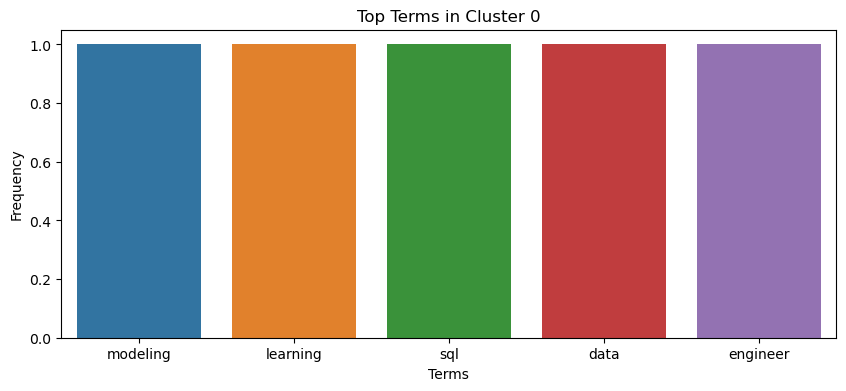

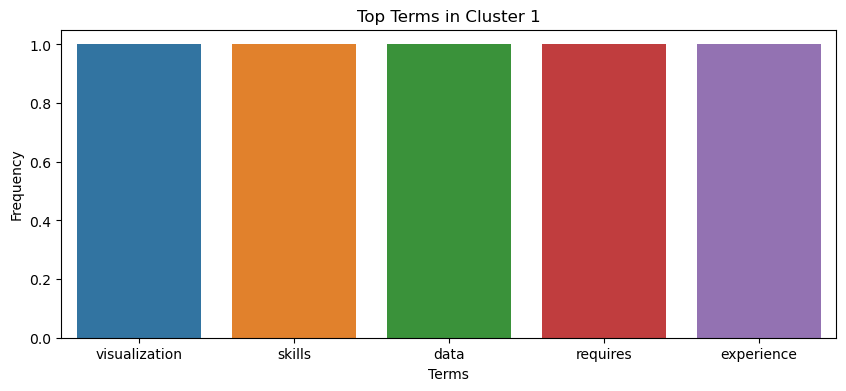

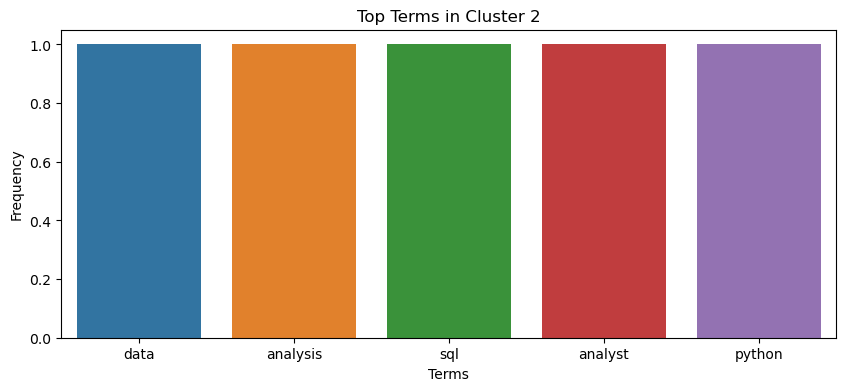

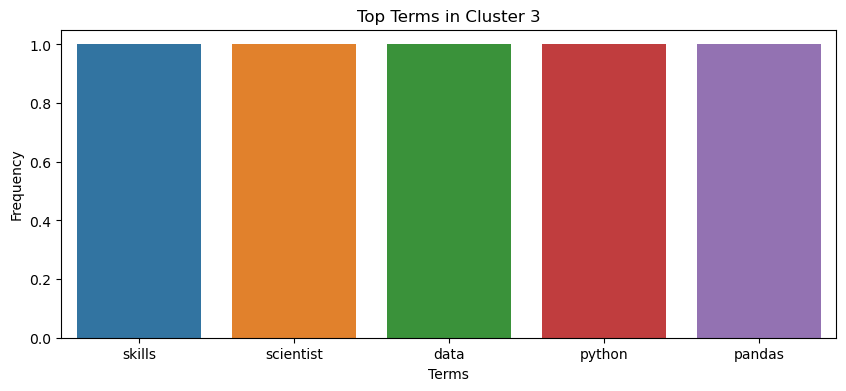

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Bar plot for the top terms in each cluster
cluster_terms = {
    0: ['modeling', 'learning', 'sql', 'data', 'engineer'],
    1: ['visualization', 'skills', 'data', 'requires', 'experience'],
    2: ['data', 'analysis', 'sql', 'analyst', 'python'],
    3: ['skills', 'scientist', 'data', 'python', 'pandas'],
}

for cluster, terms in cluster_terms.items():
    plt.figure(figsize=(10, 4))
    sns.barplot(x=terms, y=[1]*len(terms))
    plt.title(f'Top Terms in Cluster {cluster}')
    plt.xlabel('Terms')
    plt.ylabel('Frequency')
    plt.show()


In [25]:
import joblib  # Library to save the model
import logging

# Example DataFrame with job descriptions (can be combined with tweet text)
data = pd.DataFrame({
    'job_descriptions': [
        "Data Analyst with expertise in Python, SQL, and data analysis.",
        "Machine Learning Engineer: Python, SQL, and data modeling required.",
        "Looking for a Data Scientist with skills in Python, pandas, numpy, and machine learning.",
        "Job requires Tableau experience and data visualization skills."
    ]
})

# Apply preprocessing
data['processed'] = data['job_descriptions'].apply(preprocess_text)

# Join tokens back into strings for vectorization
data['processed_str'] = data['processed'].apply(lambda x: ' '.join(x))

# Create a CountVectorizer to transform the text into a matrix of token counts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['processed_str'])

# View the feature names (words)
print(vectorizer.get_feature_names_out())

# Choosing the number of clusters
num_clusters = 4  # Adjust as necessary
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign clusters back to the original DataFrame
data['cluster'] = kmeans.labels_

# Function to display top terms for each cluster
def display_cluster_terms(model, vectorizer, num_words=10):
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    
    for i in range(num_clusters):
        print(f"Cluster {i}:")
        top_terms = [terms[ind] for ind in order_centroids[i, :num_words]]
        print("Top terms:", top_terms)

# Display the cluster terms
display_cluster_terms(kmeans, vectorizer)

# Save the trained model and vectorizer
joblib.dump(kmeans, r'C:\temp\kmeans_model.joblib')
joblib.dump(vectorizer, r'C:\temp\vectorizer.joblib')


print("Model and vectorizer saved successfully.")

['analysis' 'analyst' 'data' 'engineer' 'experience' 'expertise' 'job'
 'learning' 'looking' 'machine' 'modeling' 'numpy' 'pandas' 'python'
 'required' 'requires' 'scientist' 'skills' 'sql' 'tableau'
 'visualization']
Cluster 0:
Top terms: ['modeling', 'learning', 'sql', 'data', 'engineer', 'required', 'python', 'machine', 'analyst', 'experience']
Cluster 1:
Top terms: ['visualization', 'skills', 'data', 'requires', 'experience', 'job', 'tableau', 'looking', 'analyst', 'engineer']
Cluster 2:
Top terms: ['data', 'analysis', 'sql', 'analyst', 'python', 'expertise', 'looking', 'engineer', 'experience', 'job']
Cluster 3:
Top terms: ['skills', 'scientist', 'data', 'python', 'pandas', 'numpy', 'machine', 'looking', 'learning', 'visualization']
Model and vectorizer saved successfully.


C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [26]:
pip install requests


Note: you may need to restart the kernel to use updated packages.


In [27]:
import requests
import pandas as pd

# Set up your SerpApi API key
SERPAPI_KEY = "fe58e4bbc03b3c9fefafcc2afebb34c7d4464f7d335bad49cd7799dd6b5adb1b"  #your actual API key

def fetch_google_jobs(job_title, location):
    # Set up the SerpApi endpoint and parameters
    endpoint = "https://serpapi.com/search"
    params = {
        "engine": "google_jobs",
        "q": job_title,
        "location": location,
        "api_key": SERPAPI_KEY
    }

    # Make the API request
    response = requests.get(endpoint, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        jobs = data.get('jobs_results', [])
        return jobs
    else:
        print("Error:", response.status_code, response.text)
        return []

# Example usage
job_title = "Data Scientist"
location = "New York, NY"
jobs = fetch_google_jobs(job_title, location)

# Convert to DataFrame for easier analysis
job_df = pd.DataFrame(jobs)
job_df = job_df[['title', 'company_name', 'location', 'description']]

# Display the fetched job data
job_df.head()


,title,company_name,location,description
0,Senior Staff Data Scientist,Intuit,"New York, NY",Intuit is looking for innovative and hands-on ...
1,"Manager, Data Scientist",Pfizer,"New York, NY",Global Commercial Analytics leverages data to ...
2,Data Scientist (Remote),Jun Group,"New York, NY",Jun Group is a technology company building a w...
3,"Data Scientist Intern, Campus, United States -...",Boston Consulting Group,"New York, NY (+3 others)",Locations: Boston | Pittsburgh | New York | Lo...
4,"Principal Data Scientist, Commercial Banking D...",Capital One,"New York, NY","11 West 19th Street (22008), United States of ..."
